<a href="https://colab.research.google.com/github/gnaneswar-18/machine-learning/blob/main/knn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import random


dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labs/Social_Network_Ads.csv")

x=dataset[['Age', 'EstimatedSalary']].values
y=dataset['Purchased'].values


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("Train data dimensions:", x_train.shape, y_train.shape)
print("Test data dimensions:", x_test.shape, y_test.shape)


Train data dimensions: (320, 2) (320,)
Test data dimensions: (80, 2) (80,)


In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))

def knn(x_input_train,y_train,x_test,k=3):
    y_pred = []
    for test_point in x_test:
        distances=[euclidean_distance(test_point, x_train) for x_train in x_train]
        neighbors_indices=np.argsort(distances)[:k]
        print(neighbors_indices)
        neighbors_labels=[y_train[i] for i in neighbors_indices]
        most_common=Counter(neighbors_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

y_pred=knn(x_train, y_train, x_test)
print("predicted labels",y_pred)
print("actual labels",y_test)


[220 246 171]
[168 247 255]
[198 253  25]
[ 44 250 198]
[120 298  15]
[191   7 275]
[223 206 151]
[169  54 109]
[ 49 218   8]
[279  35 145]
[ 71  78 153]
[179  76 289]
[79 34 47]
[294  89 238]
[120 298 299]
[213 305 196]
[98 84 64]
[ 44 250  33]
[170 259 172]
[24 87 20]
[100  77  36]
[220 171 246]
[236 285 180]
[155  35 145]
[250  44 263]
[261  23 280]
[294  89 238]
[115 181 122]
[138 193 132]
[220 171  30]
[278   0 227]
[307  31 130]
[ 17  60 319]
[168 247 255]
[140 149 275]
[  1 146 262]
[273  63 132]
[115 122 181]
[ 22 267 146]
[148  50  10]
[303 257  94]
[247 168 255]
[264 230 215]
[27 18 26]
[198 253  25]
[  4  29 290]
[310 297 209]
[300  72  55]
[191   7 275]
[214   0 227]
[303 257  94]
[64 98 84]
[ 18  27 165]
[127 180 236]
[193 262 146]
[181 115 122]
[249 179  76]
[103 185 297]
[173 309 197]
[181 198 253]
[261 280  23]
[ 28  68 137]
[216 311 202]
[64 98 84]
[115 122 181]
[240 224 207]
[310 297 209]
[137  68  28]
[  1 146 262]
[  6 288 152]
[188 133 109]
[ 86  19 228]
[314 251 1

In [ ]:
def accuracy(y_actual,y_pred):
    correct=np.sum(y_actual == y_pred)
    return correct/len(y_actual)

def confusion_matrix(y_actual,y_pred):
    unique_classes=np.unique(y_actual)
    matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=int)

    for true_label,pred_label in zip(y_actual,y_pred):
        matrix[int(true_label), int(pred_label)]+=1

    return matrix

acc = accuracy(y_test, y_pred)
print(f"accuracy: {acc * 100:.2f}%")
conf_matrix=confusion_matrix(y_test, y_pred)
print("confusion Matrix:\n", conf_matrix)


accuracy: 82.50%
confusion Matrix:
 [[45 10]
 [ 4 21]]


[220]
[168]
[198]
[44]
[120]
[191]
[223]
[169]
[49]
[279]
[71]
[179]
[79]
[294]
[120]
[213]
[98]
[44]
[170]
[24]
[100]
[220]
[236]
[155]
[250]
[261]
[294]
[115]
[138]
[220]
[278]
[307]
[17]
[168]
[140]
[1]
[273]
[115]
[22]
[148]
[303]
[247]
[264]
[27]
[198]
[4]
[310]
[300]
[191]
[214]
[303]
[64]
[18]
[127]
[193]
[181]
[249]
[103]
[173]
[181]
[261]
[28]
[216]
[64]
[115]
[240]
[310]
[137]
[1]
[6]
[188]
[86]
[314]
[35]
[103]
[34]
[69]
[250]
[1]
[160]
[220 246]
[168 247]
[198 253]
[ 44 250]
[120 298]
[191   7]
[223 206]
[169  54]
[ 49 218]
[279  35]
[71 78]
[179  76]
[79 34]
[294  89]
[120 298]
[213 305]
[98 84]
[ 44 250]
[170 259]
[24 87]
[100  77]
[220 171]
[236 285]
[155  35]
[250  44]
[261  23]
[294  89]
[115 181]
[138 193]
[220 171]
[278   0]
[307  31]
[17 60]
[168 247]
[140 149]
[  1 146]
[273  63]
[115 122]
[ 22 267]
[148  50]
[303 257]
[247 168]
[264 230]
[27 18]
[198 253]
[ 4 29]
[310 297]
[300  72]
[191   7]
[214   0]
[303 257]
[64 98]
[18 27]
[127 180]
[193 262]
[181 115]
[249 1

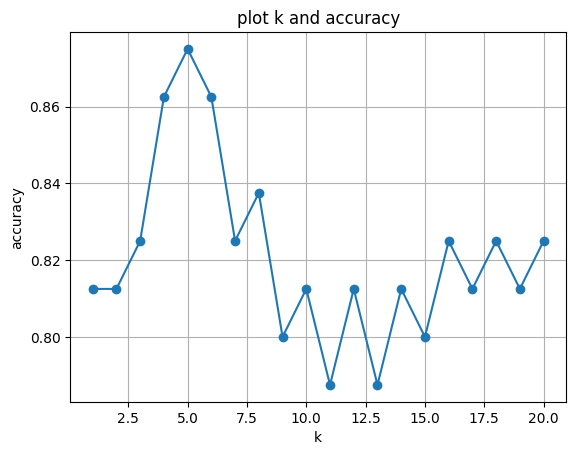

In [ ]:
import matplotlib.pyplot as plt
def plot_k_vs_accuracy(X_train, y_train, X_test, y_test):
    k_values = range(1, 21)
    accuracies = []
    for k in k_values:
        y_pred = knn(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('plot k and accuracy')
    plt.grid(True)
    plt.show()
plot_k_vs_accuracy(x_train, y_train, x_test, y_test)
